```
Assume there are two parties, Party 0 and Party 1.
Say there are 3 voters.

There are exactly eight possible ways in which votes for the 2 parties could be cast:
000
001
010
011
100
101
110
111

Now, consider the following subset:
010
011
100
101

From the point of view of the third voter, these are the only votes that count.
Why ?

Because, for something not in the subset like say 000
the decision to go with Party 0 has already been made by 1st & 2nd voter. 
The 3rd voter's vote is immaterial because 0 is already a majority.

Whereas for a member of the subset say 010
the decision to go with 0 or a 1 is still open because they have equal votes.
Voter 3 comes along, casts his vote of 0 and swings the decision to Party 0 ( the case 010 )
Voter 3 comes along, casts his vote of 1 and swings the decision to Party 1 ( the case 011 )
So Voter 3 matters.

How much does Voter 3 matter ?
Well, the ratio of the size of the subset to the size of the whole set 
is the probability of Voter 3 mattering. 
In this case, its 4/8  = 0.5

In other words, if you have a family of 3 - 
Mom, Dad & Kid, 
you want to vote on whether to visit the moviehouse or the museum, 
you should vote. 
Because your vote matters. 
There's a 50% chance you can make a difference.

As kids in larger families know, their votes matter less and less :(
If your standard classroom of 31 kids
is choosing between a movie and a musuem, 
chances that the 31st kid can swing the vote is pretty low. 
How low ?

We could quantify all this with basic binomial stats.
However, we shall use some programming machinery instead.

1. Let's start with numpy
2. Then scipy
3. Finally, tensorflow
```

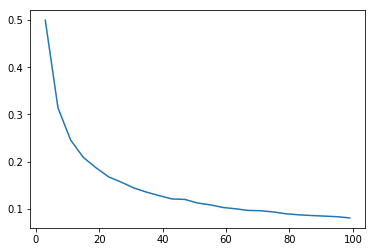

0.14681
0.02541


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

def chancesOfSwingVote(n):
    # number of simulations
    N = 100000
    
    # a binomial distribution of n voters with equal choice of 50% among [0,1]
    # lets create N such rows ie. (N,n) 
    u = np.random.binomial(1,0.5,(N,n)) 
    
    # number of times the last voter makes a difference
    ctr = 0
    
    for i in range(N):
        arr = u[i]
        
        # get rid of the last voter
        excludelast = arr[:n-1] 
        
        # you want to count how many votes are 0 and how many are 1
        bc = np.bincount(excludelast.ravel())
        
        #print(bc)
        # If the zero-votes are identical to one-votes excluding the last voter
        # then the last voter makes a difference!
        if len(bc) == 2 and bc[0] == bc[1]:
            ctr += 1
    
    # spit out the ratio of subset size over total size
    return ctr/N

start_time = timeit.default_timer()

X = np.arange(3,101,4)
Y = list(map(chancesOfSwingVote, X))
elapsed1 = timeit.default_timer() - start_time

plt.plot(X,Y)
plt.show()

# Class of 31 kids
print(chancesOfSwingVote(31))

# A school of 1001 kids
print(chancesOfSwingVote(1001))

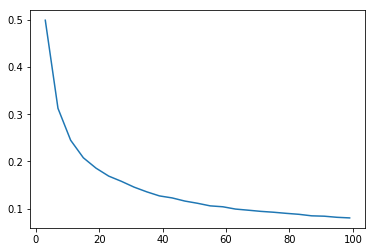

0.14288


In [2]:
from scipy.stats import binom

def chancesOfSwingVote(n):
    # number of simulations
    N = 100000
    
    # a binomial distribution of n voters with equal choice of 50% among [0,1]
    # lets create N such rows ie. (N,n) 
    u = binom.rvs(1,0.5, size=(N,n))
    # number of times the last voter makes a difference
    ctr = 0
    
    for i in range(N):
        arr = u[i]
        
        # get rid of the last voter
        excludelast = arr[:n-1] 
        
        # If there are equal number of 0's and 1's, the mean is 0.5
        if np.mean(excludelast) == 0.5:
            ctr += 1
    
    # spit out the ratio of subset size over total size
    return ctr/N

start_time = timeit.default_timer()

X = np.arange(3,101,4)
Y = list(map(chancesOfSwingVote, X))
elapsed2 = timeit.default_timer() - start_time

plt.plot(X,Y)
plt.show()

# Class of 31 kids
print(chancesOfSwingVote(31))

In [3]:
import tensorflow as tf
sess = tf.InteractiveSession()

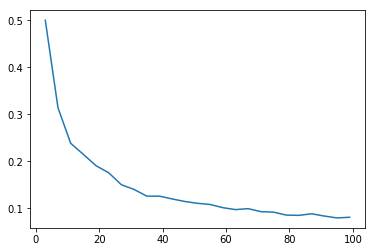

0.1501


In [4]:
def chancesOfSwingVote(n):
    N = 10000
    u = tf.random_uniform((N,n), minval= 0, maxval=2, dtype=tf.int32)
    mat = u.eval() # evaluate the tf object ONLY ONCE, NOT IN A BLOODY LOOP
    ctr = 0
    for i in range(N):
        arr = mat[i] # work off of the evaluated matrix
        excludelast = arr[:n-1] 
        if np.mean(excludelast) == 0.5:
            ctr += 1
    
    return ctr/N

start_time = timeit.default_timer()
X = np.arange(3,101,4)
Y = list(map(chancesOfSwingVote, X))
elapsed3 = timeit.default_timer() - start_time

plt.plot(X,Y)
plt.show()

# Class of 31 kids
print(chancesOfSwingVote(31))

In [7]:
print("Numpy exec time" + str(elapsed1) + "  Scipy exec " + str(elapsed2) + "  TF exec" + str(elapsed3))

Numpy exec time9.421574197000155  Scipy exec 53.001888457998575  TF exec5.181148067000322


In [8]:
len(X)*10*elapsed3 # len(X) is number of times tf function is called, & sample size is smaller by 10x

1295.2870167500805

```
Notes on the code:

1. In numpy, np.random.binomial(MAX,p,(N,n)) gives you (Nxn) samples, each sample is the number of SUCCESSES if MAX trials were performed with p being the probability of success in a trial.
Hence if p = 1, you simply get MAX. 
p=0 gets you 0. 
p  between 0 & 1 would give you a number between [0,MAX]
To simulate a voting scenario, np.random.binomial(1,0.5) would give you number of successes if you run 1 trial with 50% chance of winning, so returns either a 0 or a 1. To get (Nxn) samples, use np.random.binomial(1,0.5,(N,n))

2. Given an array like [0,1,0,0,1,1,] np.bincount counts the number of 0 bins & number of 1 bins.
You want to make sure both zero & 1 bins exist (len(bc) ==2), & then check the count.

3. scipy.stats.binom.rvs API is identical to np.random.binomial

4. It should be clear that instead of counting zeros & ones in an array, we can simply compute the mean of the array. If there were equal number of 0s & 1s, the mean should be 0.5

5. In tensorflow, the random uniform distribution with min of 0 & max of 2 is identical to a binomial with 1 trial & 50% chance of success. For Nxn samples, you have
tf.random_uniform((N,n), minval= 0, maxval=2, dtype=tf.int32)

6. Evaluate the tensor exactly once ( expensive!) and store results in some array that can then be indexed into. Once you have an interactive tensorflow session (sess = tf.InteractiveSession()), the eval() op on a tensor evaluates its contents.

7. Regards speed of execution, numpy >>  scipy >> tf. Numpy is way faster. tf's sample size has been scaled down 10x from 100k to 10k, to let it complete fast. 
numpy: 9 sec
scipy: 53 sec
tf: 1295 sec
```